# Get started with CTDYN

The CTDYN code uses a finite-difference approach to search the eigenvalues of the mean-field stellar dynamo problem corresponding to oscillating solutions. This tutorial is aimed at presenting a walkthrough of the main functionality of the `py_ctdyn` Python, which allows to altogether configure CTDYN inputs, run the Fortran executable, and analyse the outputs.

Before running this tutorial, you should check that you have compiled CTDYN and that the `$CTDYN_DIR$` environment variable exists.

### Running CTDYN

In [1]:
import py_ctdyn as dyn

Once the module is imported, we can set some input parameters that will be used to run CTDYN. This is done through a dictionary of dictionaries, each of them corresponding to one of the namelist expected by the Fortran code (e.g. `outputs` or `global`).

In [2]:
dir_out = "ctdyn_output"
ctdyn_param = {"outputs" : {"dir":"'{}'".format (dir_out)},
               }

The `run_ctdyn` function launches the CTDYN executable. A directory containing the CTDYN outputs is created. CTDYN standard outputs are redirected to `ctdyn.out` and error log to `ctdyn.err`.

In [3]:
dyn.run_ctdyn (ctdyn_param=ctdyn_param, verbose=True,
               rerun=False)

Inlist file already exists and rerun=False, CTDYN was not executed.


{'outputs': {'dir': "'ctdyn_output'"},
 'global': {},
 'profiles': {},
 'brent': {},
 'boundaries': {},
 'fields': {},
 'physics': {},
 'controls': {}}

### Analysing CTDYN results

The main parameters of the dynamo are summarised in a specific output file. The dynamo is parameterised by a set of adimensioned coefficients. $C_\alpha$ and $C_\Omega$, related to the $\alpha$-effect and the stellar rotation, respectively, have the following definition :

$C_\alpha = \alpha_0 R_\star / \eta_t$ ;

$C_\Omega = \Omega_\star R_\star^2 / \eta_t$ ; 

where $\alpha_0$ is the amplitude of the $\alpha$-effect, $\Omega_\star$ is the stellar rotation frequency, and $\eta_t$ is the turbulent diffusivity. 

Depending on the choice of input, the control parameter for the meridional circulation might depends on the $C_\Omega$, in the following way:

$C_{\rm meridional} = Re_0 + Re_1 C_\Omega^{x_m}$ ;

where the default value for $x_m$ is $x_m = -0.45$ (`xm` parameter from the `physics` namelist). The Reynolds number related to meridional circulation $Re$ can be computed as $v_{\rm meridional} R_\star / \eta_t$. $Re_0$ and $Re_1$ corresponds to the quantities `rm_i` and `rm_f` from the `controls` namelist.

In practice, in CTDYN, $C_\Omega$ is directly computed from the inputs, and $\eta_t$ is computed from the relation between the two quantities. The $C_\Omega$ (`co`) value can be set using the `cm_i`, `cm_f` and `nso` parameters from the `controls` namelist. 
At the `ii`th iteration on the range `(0, nso)`, the `co` variable will take the value `co = = cm_i + ii / (nso+1) * (cm_f - cm_i)`, which means that if `nso > 0`, the code will explore and summarise different dynamo configurations, varying $C_\Omega$, $C_{\rm meridional}$, and $\eta$ in the process.

In [4]:
filename = "{}/critical_a0.dat".format (dir_out)
summary = dyn.read_summary_file (filename)
summary

n,C_alpha,C_omega,C_meridional,omega_cycle,period,eta,beta,Etor,Epol
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,8.4583,1000.0,17.867,21.569,3.1912,14002000000000.0,0.0,0.0,0.0


In [5]:
filename = "{}/alpha.dat".format (dir_out)
df = dyn.read_radial_profiles (filename) 

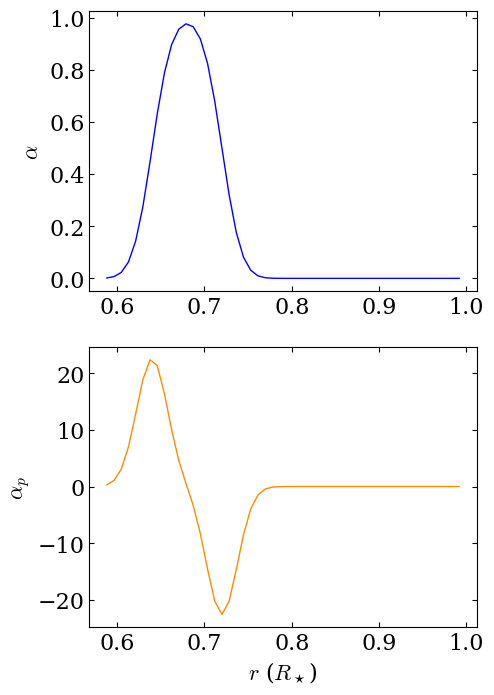

In [6]:
fig = dyn.plot_alpha (df)

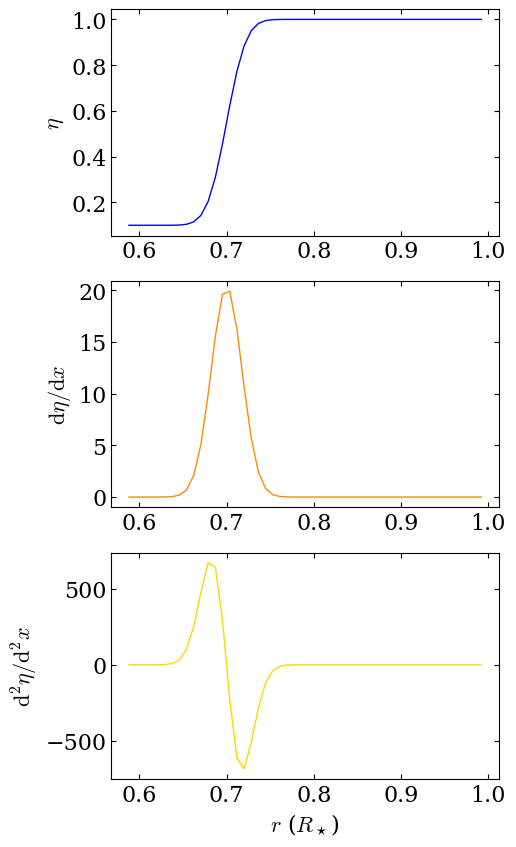

In [7]:
fig = dyn.plot_eta (df)

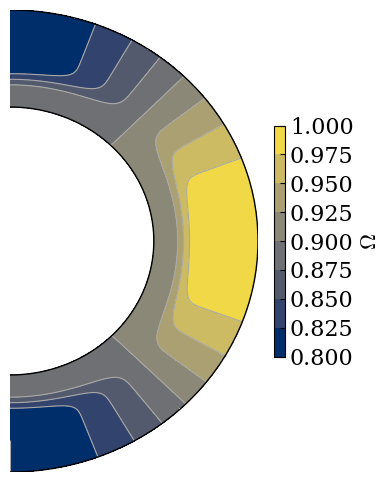

In [8]:
filename = "{}/omega.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$\Omega$", 
                               cmap="cividis")

/Users/sbreton/miniconda3/envs/main-3.9/lib/python3.9/site-packages/py_ctdyn/outputs.py:237: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh (x, y, mesh_m, cmap=cmap, norm=norm)


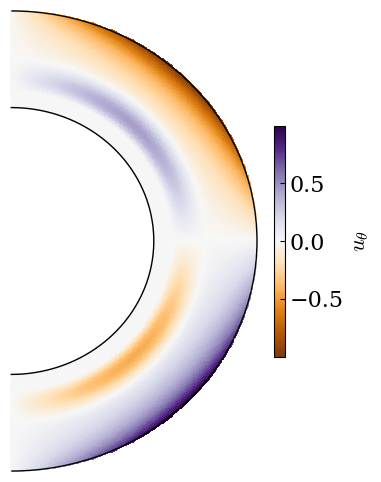

In [9]:
filename = "{}/utheta.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"$u_\theta$", cmap="PuOr", 
                               mode="pcolormesh", contour=False)

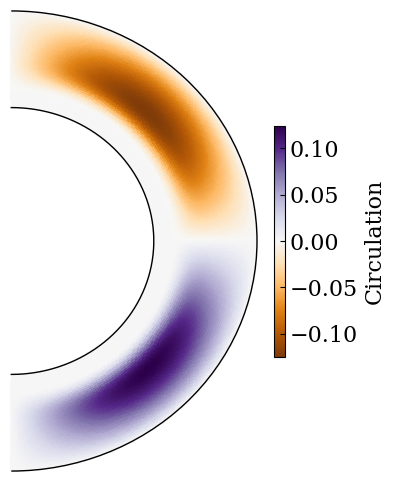

In [10]:
filename = "{}/stream.dat".format (dir_out)
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, 
                               label=r"Circulation", cmap="PuOr", 
                               mode="pcolormesh", contour=False)

In [11]:
ii, time = 1, 6

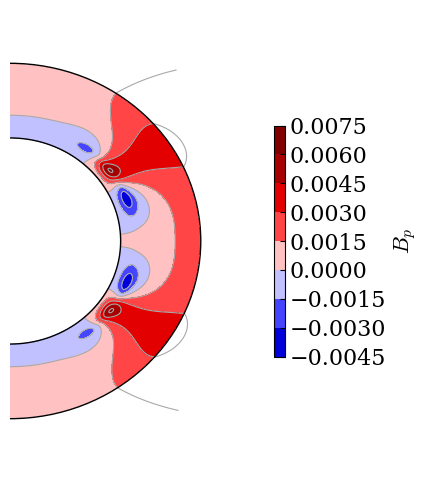

In [12]:
filename = "{}/pfld.{}.t{}.A00".format (dir_out, str (ii).zfill (6), 
                                        str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_p$",
                               mode="contourf")

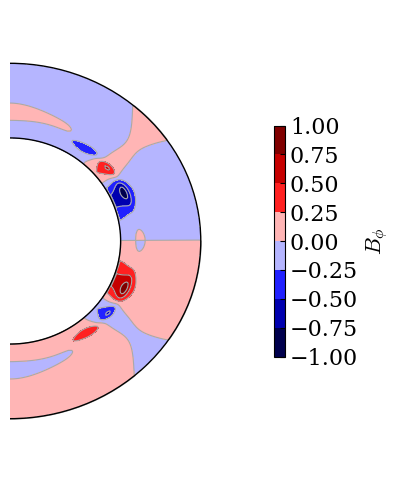

In [13]:
filename = "{}/tfld.{}.t{}.A00".format (dir_out, str (ii).zfill (6), 
                                        str (time).zfill (2))
r, theta, mesh = dyn.read_field_map (filename)
fig = dyn.plot_meridional_map (r, theta, mesh, label=r"$B_\phi$")

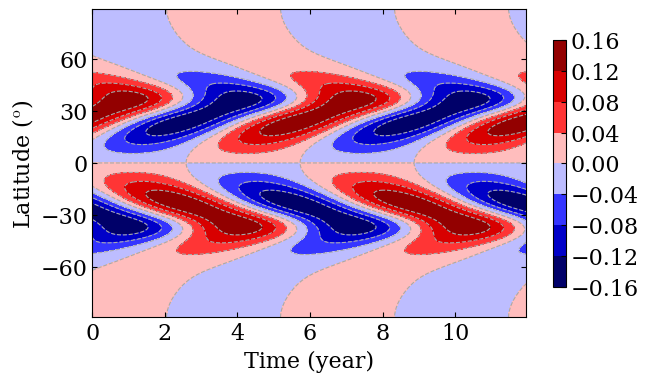

In [14]:
filename = "{}/butf.000001.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)

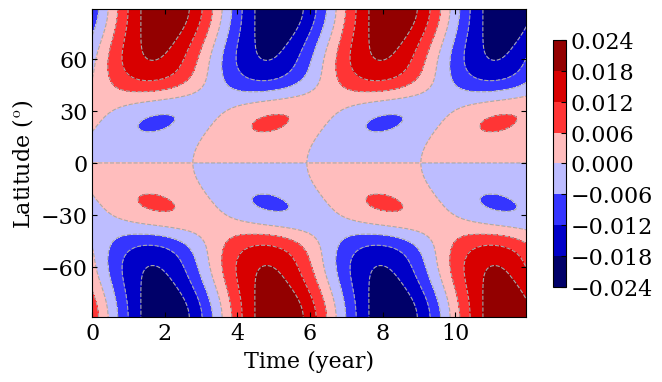

In [15]:
filename = "{}/brbp.000001.a00".format (dir_out)
t, theta, mesh = dyn.read_butterfly_diagram (filename)
fig = dyn.plot_butterfly_diagram (t, theta, mesh)